Accessing and Plotting Meshes
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

The 'Mesh' Dataset
----------------------

**NOTE:** the "pbmesh" and "protomesh" have been removed as of PHOEBE 2.1+.

You must create a mesh dataset and specify the times and columns which you'd like exposed.  For more information, see the tutorial on the [MESH dataset](MESH).

The mesh will be exposed at the times specified by the 'times' Parameter, as well as any times referenced by the 'include_times' Parameter.

So let's add a LC and MESH dataset.


In [3]:
b.add_dataset('lc', times=np.linspace(0,1,6))

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [4]:
b.add_dataset('mesh')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [5]:
print b['times@mesh']

Parameter: times@mesh01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [6]:
print b['include_times@mesh']

Parameter: include_times@mesh01@dataset
                       Qualifier: include_times
                     Description: append to times from the following datasets/time standards
                           Value: []
                         Choices: lc01, t0_perpass@binary, t0_supconj@binary, t0_ref@binary, t0@system



Note that we can no manually set the times of the mesh AND/OR reference the times for existing non-mesh datasets (such as the light curve we just added) as well as any of the various t0s in the system.

In [7]:
b['times@mesh'] = [10]

In [8]:
b['include_times@mesh'] = ['lc01']

In [9]:
b.run_compute()

<ParameterSet: 32 parameters | kinds: mesh, lc>

In [10]:
print b['mesh@model'].times

['00.400000', '10.000000', '01.000000', '00.600000', '00.800000', '00.200000', '00.000000']


By default, the mesh only exposes the geometric columns of the triangles

In [11]:
print b['mesh@model'].qualifiers

['xyz_elements', 'uvw_elements', 'times']


But we can also specify other columns to be included (by setting the columns parameter *before* calling run_compute)

In [12]:
print b['columns@mesh']

Parameter: columns@mesh01@dataset
                       Qualifier: columns
                     Description: columns to expose within the mesh
                           Value: []
                         Choices: volume, xs, ys, zs, vxs, vys, vzs, nxs, nys, nzs, us, vs, ws, vus, vvs, vws, nus, nvs, nws, areas, loggs, teffs, rprojs, mus, visibilities, visible_centroids, rs, intensities@lc01, normal_intensities@lc01, abs_intensities@lc01, abs_normal_intensities@lc01, boost_factors@lc01, ldint@lc01, pblum@lc01, abs_pblum@lc01, ptfarea@lc01



In [13]:
b['columns@mesh'] = ['teffs']

In [14]:
b.run_compute()

Sun, 14 Oct 2018 11:00 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 46 parameters | kinds: mesh, lc>

In [15]:
print b['mesh@model'].qualifiers

['xyz_elements', 'uvw_elements', 'teffs', 'times']


In [16]:
print b.get_value('teffs', time=0.0, component='primary')

[6026.91748731 6026.97665997 6026.91260356 ... 5993.51016065 5993.2855728
 5994.18366387]


Any of the exposed columns are then available for plotting the mesh.

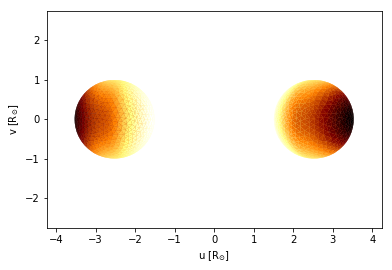

In [19]:
afig, mplfig = b['mesh@model'].plot(time=0.2, fc='teffs', ec='none', show=True)